<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/QUIZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANGGA BAYU SETIAWAN-2241720106**

In [1]:
!pip install -q ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
adult_income = fetch_ucirepo(id=2)

In [4]:
X = adult_income.data.features
y = adult_income.data.targets

df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(48842, 15)

# Soal 1
# Lakukan inspeksi profile data
# Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?

In [15]:
import pandas as pd
import numpy as np

# 1. Mengubah nilai '?' menjadi NaN
df.replace('?', np.nan, inplace=True)

# 2. Menampilkan informasi umum (tipe data dan non-null count)
print("--- Informasi Umum DataFrame ---")
df.info()

print("\n" + "="*50 + "\n")

# 3. Menghitung dan menampilkan jumlah nilai yang hilang
print("--- Jumlah Nilai yang Hilang (Missing Values) ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Hanya menampilkan kolom yang memiliki missing values

print("\n" + "="*50 + "\n")

# 4. Menampilkan statistik deskriptif untuk semua kolom
print("--- Statistik Deskriptif ---")
print(df.describe(include='all'))

--- Informasi Umum DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


--- Jumlah Nilai yang Hilang (Missing Values) ---
workclas

# Soal 2
# Lakukan data imputation pada fitur yang memiliki data yang hilang
# Cek kembali apakah masih terdapat data yang hilang



In [17]:
df.fillna(df.mode()['workclass'][0], inplace=True)
df.fillna(df.mode()['occupation'][0], inplace=True)
df.fillna(df.mode()['native-country'][0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Soal 3
# Inspeksi semua fitur kualitatif. Jika terdapat value yang tidak sesuai, ganti dengan 'Others' atau yang sesuai
# atau jika terdapat duplikasi karena kesalahan penulisan, lakukan penyesuaian.

In [18]:
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

# Replace
df['workclass'] = df['workclass'].replace(['?', 'Without-pay', 'Never-worked'], 'Others')
df['occupation'] = df['occupation'].replace(['?', 'Armed-Forces'], 'Others')
df['occupation'] = df['occupation'].replace(['?'], 'Others-service')
df['native-country'] = df['native-country'].replace(['?'], 'Others')
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Private'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Private' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Tha

In [19]:
# Cek
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Others']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Private'
 'Protective-serv' 'Others' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Private' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' '

**Soal 2 - Visual Inspection**

# Lakukan inspeksi visual pada,
# 1. Pada kolom 'age' dengan menggunakan histrogram
# 2. Pada kolom 'education' education menggunakan barchart
# 3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot
# 4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

# 4. Fenomena apa yang terjadi pada distribusi data 'age'?
# 5. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
# 6. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?
# 7. Cek korelasi antar seluruh variabel numerik. Pasangan variabel apa saja yang memiliki korelasi yang lemah (+- 0.5)


<Axes: xlabel='age', ylabel='Count'>

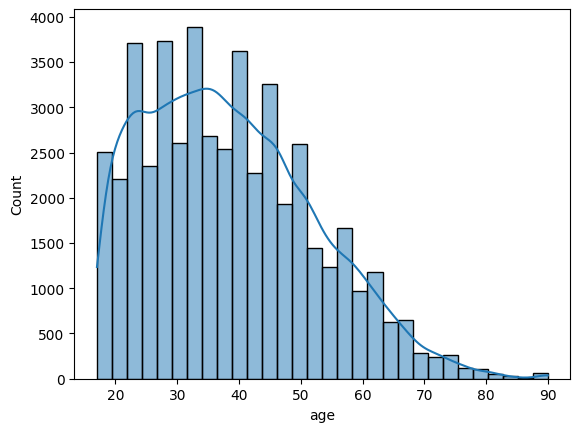

In [20]:
sns.histplot(df['age'], bins=30, kde=True)

<Axes: xlabel='education', ylabel='count'>

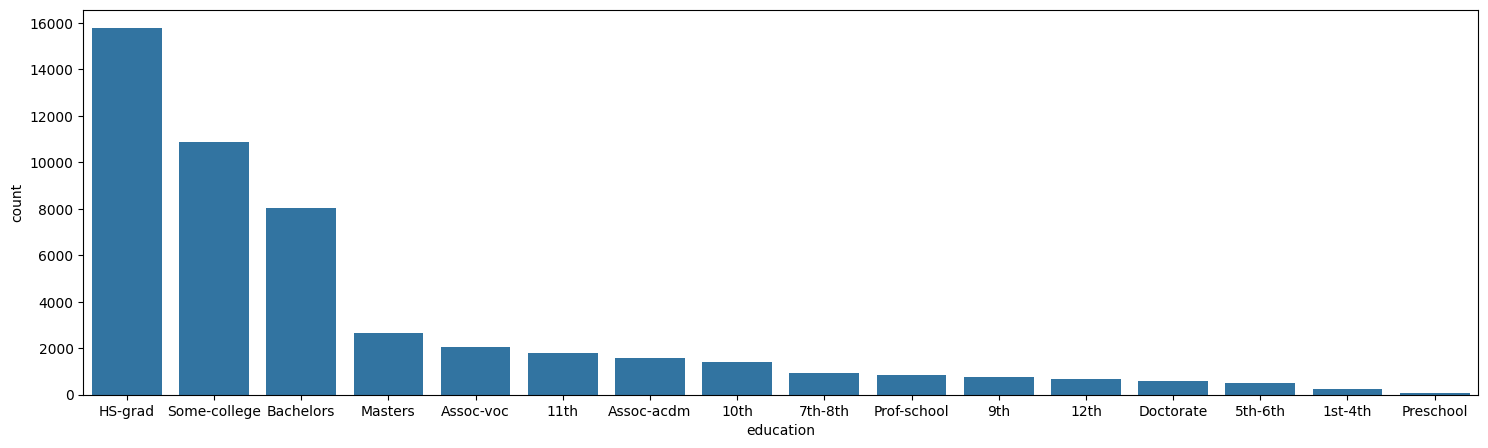

In [21]:
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(x=df['education'].value_counts().index, y=df['education'].value_counts(), ax=ax)

<Axes: xlabel='income', ylabel='hours-per-week'>

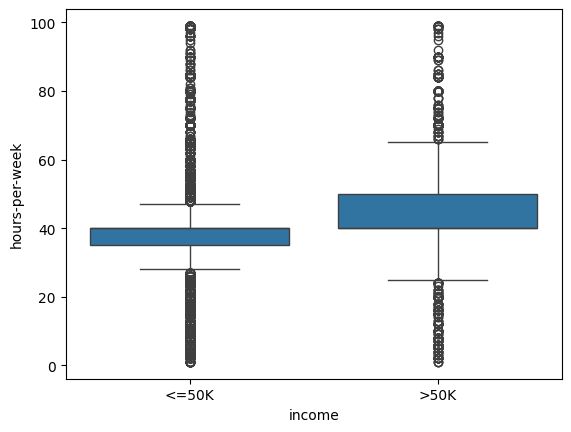

In [22]:
sns.boxplot(x='income', y='hours-per-week', data=df)

In [23]:
# Function to count outliers
def count_outliers(df, column, group_column):
    outlier_counts = {}
    for category in df[group_column].unique():
        subset = df[df[group_column] == category][column]
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        outlier_counts[category] = len(outliers)
    return outlier_counts

# Count outliers for 'hours-per-week' based on 'income'
outlier_counts = count_outliers(df, 'hours-per-week', 'income')

# Print the outlier counts
for category, count in outlier_counts.items():
    print(f"Income category '{category}': {count} outliers in 'hours-per-week'")

Income category '<=50K': 11706 outliers in 'hours-per-week'
Income category '>50K': 781 outliers in 'hours-per-week'


<Axes: >

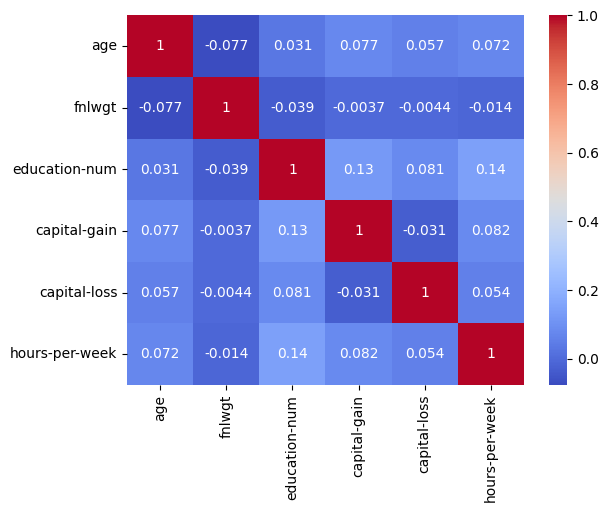

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

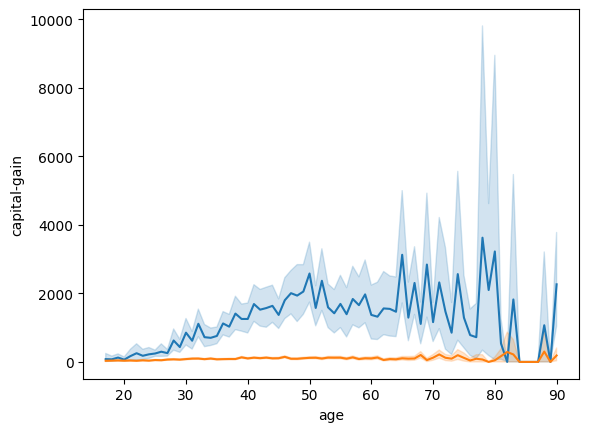

In [25]:
sns.lineplot(x='age', y='capital-gain', data=df)
sns.lineplot(x='age', y='capital-loss', data=df)
plt.show()

**Soal 3 - Encoding**

# Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode 'sex'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
sex_encoded = encoder.fit_transform(df[['sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['sex']))
df = pd.concat([df.drop('sex', axis=1), sex_encoded_df], axis=1)

# Label encode 'income'
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])

display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,sex_Female,sex_Male,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0.0,1.0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0.0,1.0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0.0,1.0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0.0,1.0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1.0,0.0,0


Soal 4 - Korelasi

In [27]:
df[['age','education-num','hours-per-week','capital-gain','capital-loss','income_encoded']].corr()

,age,education-num,hours-per-week,capital-gain,capital-loss,income_encoded
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income_encoded,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000
